In [1]:
import pandas as pd

In [2]:
temperature = pd.read_csv("температура.csv", sep=";")
characteristics = pd.read_csv("характеристики_домов.csv", sep=";")
volume_of_heat = pd.read_csv("объём_теплоты.csv", sep=";")

In [3]:
print(f'temperature: {temperature.size}, characteristics: {characteristics.size}, volume_of_heat: {volume_of_heat.size}')

temperature: 50886, characteristics: 5076, volume_of_heat: 2806700


## Model temperature

In [4]:
temperature.head(7)

date_start                 date_end              temp  \
0  2017-10-01 00:00:00.000  2017-10-01 03:00:00.000  5,54000244140627   
1  2017-10-01 03:00:00.000  2017-10-01 06:00:00.000  5,86000976562502   
2  2017-10-01 06:00:00.000  2017-10-01 09:00:00.000  6,60000000000002   
3  2017-10-01 09:00:00.000  2017-10-01 12:00:00.000  9,52999267578127   
4  2017-10-01 12:00:00.000  2017-10-01 15:00:00.000  9,55001220703127   
5  2017-10-01 15:00:00.000  2017-10-01 18:00:00.000  6,10000000000002   
6  2017-10-01 18:00:00.000  2017-10-01 21:00:00.000  4,96999511718752   

           temp_max          temp_min  humidity  
0  5,54000244140627  4,86800537109377       100  
1  5,86000976562502  4,95900878906252       100  
2  6,60000000000002  5,76400146484377       100  
3  9,52999267578127  7,83098754882815        95  
4  9,55001220703127  8,61800537109377        87  
5  6,58999023437502  6,10000000000002        89  
6  5,43999633789065  4,96999511718752        91

In [5]:
temperature = temperature.drop(['temp_max', 'temp_min'], axis=1)

In [6]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_start  8481 non-null   object
 1   date_end    8481 non-null   object
 2   temp        8481 non-null   object
 3   humidity    8481 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 265.2+ KB


In [7]:
temperature["temp"] = temperature["temp"].str.replace(',', '.', regex=False)

In [8]:
temperature['temp'] = temperature['temp'].astype('float32')

In [9]:
temperature['date_start'] = pd.to_datetime(temperature['date_start'], format='mixed').dt.strftime('%m.%d.%Y')
temperature['date_end'] = pd.to_datetime(temperature['date_end'], format='mixed').dt.strftime('%m.%d.%Y')

In [10]:
temperature['date_start'] = temperature['date_start'].astype('datetime64[ns]')
temperature['date_end'] = temperature['date_end'].astype('datetime64[ns]')

In [11]:
import datetime

In [12]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_start  8481 non-null   datetime64[ns]
 1   date_end    8481 non-null   datetime64[ns]
 2   temp        8481 non-null   float32       
 3   humidity    8481 non-null   int64         
dtypes: datetime64[ns](2), float32(1), int64(1)
memory usage: 232.0 KB


In [13]:
temperature.head(2)

date_start   date_end      temp  humidity
0 2017-10-01 2017-10-01  5.540002       100
1 2017-10-01 2017-10-01  5.860010       100

In [14]:
temperature = temperature.drop('date_end', axis=1)

In [15]:
temperature_copy = temperature.copy()

In [16]:
temperature_copy.head(5)

date_start      temp  humidity
0 2017-10-01  5.540002       100
1 2017-10-01  5.860010       100
2 2017-10-01  6.600000       100
3 2017-10-01  9.529993        95
4 2017-10-01  9.550013        87

In [17]:
temperature_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_start  8481 non-null   datetime64[ns]
 1   temp        8481 non-null   float32       
 2   humidity    8481 non-null   int64         
dtypes: datetime64[ns](1), float32(1), int64(1)
memory usage: 165.8 KB


In [18]:
temperature_copy.head(10)

date_start      temp  humidity
0 2017-10-01  5.540002       100
1 2017-10-01  5.860010       100
2 2017-10-01  6.600000       100
3 2017-10-01  9.529993        95
4 2017-10-01  9.550013        87
5 2017-10-01  6.100000        89
6 2017-10-01  4.969995        91
7 2017-10-01  3.170007       100
8 2017-10-02  3.249994       100
9 2017-10-02  2.129999        98

In [19]:
import seaborn as sns

<Axes: >

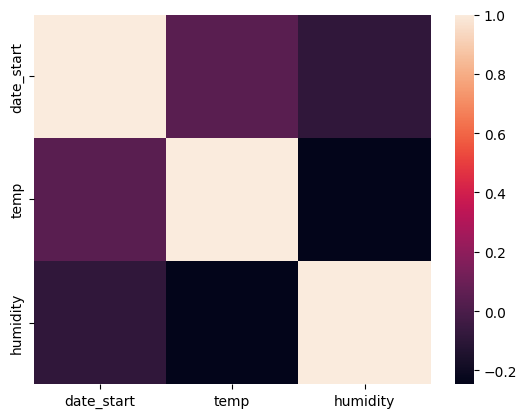

In [20]:
corr = temperature.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [21]:
temperature_copy = temperature_copy.rename(columns={'date_start' : 'date'})

In [22]:
temperature_copy.head(2)

date      temp  humidity
0 2017-10-01  5.540002       100
1 2017-10-01  5.860010       100

In [23]:
temperature_copy = temperature_copy.groupby('date').agg({'temp': 'mean', 'humidity': 'mean'})

In [24]:
temperature_copy = temperature_copy.reset_index()

In [25]:
temperature_copy.head(7)

date       temp  humidity
0 2017-10-01   6.415002    95.250
1 2017-10-02   4.072500    84.250
2 2017-10-03   6.515005    85.375
3 2017-10-04   3.240003    86.875
4 2017-10-05   8.136244    78.875
5 2017-10-06   9.822504    88.375
6 2017-10-07  11.366243    95.500

In [26]:
temperature_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1060 non-null   datetime64[ns]
 1   temp      1060 non-null   float32       
 2   humidity  1060 non-null   float64       
dtypes: datetime64[ns](1), float32(1), float64(1)
memory usage: 20.8 KB


In [27]:
temperature_copy['working_year'] = temperature_copy.date.dt.year
temperature_copy['working_month'] = temperature_copy.date.dt.month
temperature_copy['working_day'] = temperature_copy.date.dt.day

In [28]:
temperature_copy.head(2)

date      temp  humidity  working_year  working_month  working_day
0 2017-10-01  6.415002     95.25          2017             10            1
1 2017-10-02  4.072500     84.25          2017             10            2

## Model characteristics

In [29]:
characteristics.head(2)

address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  e68f3476-3f10-4374-b682-00de840dae3c      1978.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки          1234.00              0.0   
1           2746.54  ж/б блок          1078.55              0.0   

   roof_area_web  roof_area_piece_goods  
0        1234.00                    0.0  
1        1078.55                    0.0

In [30]:
characteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_uuid           564 non-null    object 
 1   build_year             563 non-null    float64
 2   floor_number           548 non-null    float64
 3   residential_area       546 non-null    float64
 4   wall_type              551 non-null    object 
 5   roof_area_total        536 non-null    float64
 6   roof_area_metal        542 non-null    float64
 7   roof_area_web          543 non-null    float64
 8   roof_area_piece_goods  542 non-null    float64
dtypes: float64(7), object(2)
memory usage: 39.8+ KB


In [31]:
characteristics = characteristics.drop_duplicates(subset=['address_uuid'])

In [32]:
characteristics['address_uuid'].duplicated().sum()

0

In [33]:
characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_uuid           556 non-null    object 
 1   build_year             555 non-null    float64
 2   floor_number           548 non-null    float64
 3   residential_area       546 non-null    float64
 4   wall_type              545 non-null    object 
 5   roof_area_total        530 non-null    float64
 6   roof_area_metal        542 non-null    float64
 7   roof_area_web          543 non-null    float64
 8   roof_area_piece_goods  542 non-null    float64
dtypes: float64(7), object(2)
memory usage: 43.4+ KB


In [34]:
characteristics.isna().sum()

address_uuid              0
build_year                1
floor_number              8
residential_area         10
wall_type                11
roof_area_total          26
roof_area_metal          14
roof_area_web            13
roof_area_piece_goods    14
dtype: int64

## Model volume_of_heat

In [35]:
volume_of_heat.head(5)

address_uuid        date  value  is_unreliable
0  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-01  1.013              0
1  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-02  1.071              0
2  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-03  1.071              1
3  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-04  1.087              0
4  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-05  1.105              0

In [36]:
volume_of_heat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701675 entries, 0 to 701674
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   address_uuid   701675 non-null  object 
 1   date           701675 non-null  object 
 2   value          701675 non-null  float64
 3   is_unreliable  701675 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 21.4+ MB


In [37]:
volume_of_heat.isna().sum()

address_uuid     0
date             0
value            0
is_unreliable    0
dtype: int64

## Full dataframe

In [38]:
merge_address = characteristics.merge(volume_of_heat, how='outer', left_on='address_uuid', right_on='address_uuid')

In [39]:
merge_address.head(2)

address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки           1234.0              0.0   
1           4621.25     Блоки           1234.0              0.0   

   roof_area_web  roof_area_piece_goods        date  value  is_unreliable  
0         1234.0                    0.0  2017-10-01  5.372            0.0  
1         1234.0                    0.0  2017-10-02  5.182            0.0

In [40]:
merge_address.isna().sum()

address_uuid                  0
build_year               137762
floor_number             143886
residential_area         145975
wall_type                146694
roof_area_total          161736
roof_area_metal          149861
roof_area_web            148800
roof_area_piece_goods    149861
date                          2
value                         2
is_unreliable                 2
dtype: int64

In [41]:
merge_address = merge_address.dropna()

In [42]:
merge_address.isna().sum()

address_uuid             0
build_year               0
floor_number             0
residential_area         0
wall_type                0
roof_area_total          0
roof_area_metal          0
roof_area_web            0
roof_area_piece_goods    0
date                     0
value                    0
is_unreliable            0
dtype: int64

In [43]:
merge_address.head(5)

address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
2  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
3  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
4  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки           1234.0              0.0   
1           4621.25     Блоки           1234.0              0.0   
2           4621.25     Блоки           1234.0              0.0   
3           4621.25     Блоки           1234.0              0.0   
4           4621.25     Блоки           1234.0              0.0   

   roof_area_web  roof_area_piece_goods        date  value  is_unreliable  
0         1234.0                    0.0  2017-10-01  5.372            0.0  
1         1234.0                    0.0  2017-10-02  5.182            0.0  
2         1234.0                    0.0  2017-10-03  5.022            0.0  
3         1234.0                    0.0  2017-10-04  5.066            0.0  
4         1234.0                    0.0  2017-10-05  4.962            0.0

In [44]:
merge_address['date'] = merge_address['date'].astype('datetime64[ns]')

In [45]:
merge_address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538883 entries, 0 to 564963
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   address_uuid           538883 non-null  object        
 1   build_year             538883 non-null  float64       
 2   floor_number           538883 non-null  float64       
 3   residential_area       538883 non-null  float64       
 4   wall_type              538883 non-null  object        
 5   roof_area_total        538883 non-null  float64       
 6   roof_area_metal        538883 non-null  float64       
 7   roof_area_web          538883 non-null  float64       
 8   roof_area_piece_goods  538883 non-null  float64       
 9   date                   538883 non-null  datetime64[ns]
 10  value                  538883 non-null  float64       
 11  is_unreliable          538883 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memor

In [46]:
merge_all = temperature_copy.merge(merge_address, how='outer', left_on='date', right_on='date')

In [47]:
merge_all.head(2)

date      temp  humidity  working_year  working_month  working_day  \
0 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   
1 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   

                           address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  e68f3476-3f10-4374-b682-00de840dae3c      1978.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки          1234.00              0.0   
1           2746.54  ж/б блок          1078.55              0.0   

   roof_area_web  roof_area_piece_goods  value  is_unreliable  
0        1234.00                    0.0  5.372            0.0  
1        1078.55                    0.0  4.477            0.0

In [48]:
merge_all.isna().sum()

date                       0
temp                     526
humidity                 526
working_year             526
working_month            526
working_day              526
address_uuid               0
build_year                 0
floor_number               0
residential_area           0
wall_type                  0
roof_area_total            0
roof_area_metal            0
roof_area_web              0
roof_area_piece_goods      0
value                      0
is_unreliable              0
dtype: int64

In [49]:
merge_all = merge_all.dropna()

In [50]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538357 entries, 0 to 538356
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   538357 non-null  datetime64[ns]
 1   temp                   538357 non-null  float32       
 2   humidity               538357 non-null  float64       
 3   working_year           538357 non-null  float64       
 4   working_month          538357 non-null  float64       
 5   working_day            538357 non-null  float64       
 6   address_uuid           538357 non-null  object        
 7   build_year             538357 non-null  float64       
 8   floor_number           538357 non-null  float64       
 9   residential_area       538357 non-null  float64       
 10  wall_type              538357 non-null  object        
 11  roof_area_total        538357 non-null  float64       
 12  roof_area_metal        538357 non-null  float64  

In [51]:
merge_all.drop(['address_uuid', 'wall_type'], axis=1).corr()

date      temp  humidity  working_year  \
date                   1.000000  0.046305 -0.095645      0.970493   
temp                   0.046305  1.000000 -0.265362     -0.009491   
humidity              -0.095645 -0.265362  1.000000     -0.083578   
working_year           0.970493 -0.009491 -0.083578      1.000000   
working_month         -0.084800  0.226301 -0.029332     -0.322024   
working_day            0.017082 -0.038092 -0.030582     -0.003828   
build_year             0.001456 -0.000123 -0.000233      0.001467   
floor_number          -0.001048 -0.000322  0.001052     -0.001376   
residential_area      -0.004622 -0.000027  0.001289     -0.004848   
roof_area_total        0.000176  0.000477  0.000396      0.000170   
roof_area_metal       -0.002185 -0.001400  0.001717     -0.001766   
roof_area_web          0.002790  0.001506 -0.000937      0.002669   
roof_area_piece_goods -0.004322 -0.000718  0.000616     -0.004352   
value                  0.005608 -0.002823  0.000140      0.005980   
is_unreliable         -0.040980  0.053786 -0.051911     -0.020405   

                       working_month  working_day  build_year  floor_number  \
date                       -0.084800     0.017082    0.001456     -0.001048   
temp                        0.226301    -0.038092   -0.000123     -0.000322   
humidity                   -0.029332    -0.030582   -0.000233      0.001052   
working_year               -0.322024    -0.003828    0.001467     -0.001376   
working_month               1.000000     0.016848   -0.000397      0.001541   
working_day                 0.016848     1.000000    0.000791      0.000350   
build_year                 -0.000397     0.000791    1.000000      0.548778   
floor_number                0.001541     0.000350    0.548778      1.000000   
residential_area            0.001898    -0.000171    0.195028      0.410714   
roof_area_total             0.000027    -0.000508   -0.296292     -0.290701   
roof_area_metal            -0.001273    -0.000160   -0.150161     -0.151817   
roof_area_web              -0.000066     0.000017    0.132342      0.040487   
roof_area_piece_goods       0.001049    -0.000612   -0.454944     -0.311140   
value                      -0.003057     0.005385   -0.001918     -0.001223   
is_unreliable              -0.077620     0.017636    0.004959      0.028649   

                       residential_area  roof_area_total  roof_area_metal  \
date                          -0.004622         0.000176        -0.002185   
temp                          -0.000027         0.000477        -0.001400   
humidity                       0.001289         0.000396         0.001717   
working_year                  -0.004848         0.000170        -0.001766   
working_month                  0.001898         0.000027        -0.001273   
working_day                   -0.000171        -0.000508        -0.000160   
build_year                     0.195028        -0.296292        -0.150161   
floor_number                   0.410714        -0.290701        -0.151817   
residential_area               1.000000         0.519788        -0.120194   
roof_area_total                0.519788         1.000000         0.212037   
roof_area_metal               -0.120194         0.212037         1.000000   
roof_area_web                  0.625498         0.610049        -0.239814   
roof_area_piece_goods         -0.228861         0.095595        -0.047749   
value                         -0.000701         0.000243         0.000609   
is_unreliable                  0.006658        -0.005034        -0.004647   

                       roof_area_web  roof_area_piece_goods     value  \
date                        0.002790              -0.004322  0.005608   
temp                        0.001506              -0.000718 -0.002823   
humidity                   -0.000937               0.000616  0.000140   
working_year                0.002669              -0.004352  0.005980   
working_month              -0.000066               0.001049

<Axes: >

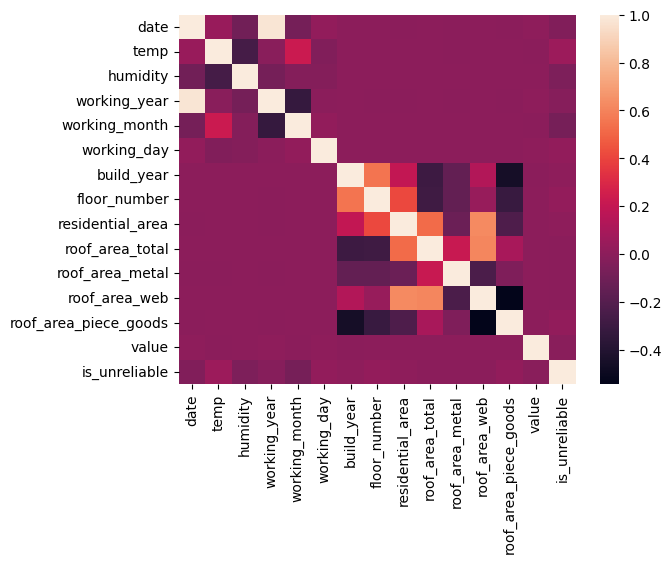

In [52]:
import seaborn as sns
corr = merge_all.drop(['address_uuid', 'wall_type'], axis=1).corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [53]:
merge_all.head().T

0  \
date                                    2017-10-01 00:00:00   
temp                                               6.415002   
humidity                                              95.25   
working_year                                         2017.0   
working_month                                          10.0   
working_day                                             1.0   
address_uuid           82c2ad6e-27db-4541-8e5d-00163bbe622e   
build_year                                           1976.0   
floor_number                                            5.0   
residential_area                                    4621.25   
wall_type                                             Блоки   
roof_area_total                                      1234.0   
roof_area_metal                                         0.0   
roof_area_web                                        1234.0   
roof_area_piece_goods                                   0.0   
value                                                 5.372   
is_unreliable                                           0.0   

                                                          1  \
date                                    2017-10-01 00:00:00   
temp                                               6.415002   
humidity                                              95.25   
working_year                                         2017.0   
working_month                                          10.0   
working_day                                             1.0   
address_uuid           e68f3476-3f10-4374-b682-00de840dae3c   
build_year                                           1978.0   
floor_number                                            5.0   
residential_area                                    2746.54   
wall_type                                          ж/б блок   
roof_area_total                                     1078.55   
roof_area_metal                                         0.0   
roof_area_web                                       1078.55   
roof_area_piece_goods                                   0.0   
value                                                 4.477   
is_unreliable                                           0.0   

                                                          2  \
date                                    2017-10-01 00:00:00   
temp                                               6.415002   
humidity                                              95.25   
working_year                                         2017.0   
working_month                                          10.0   
working_day                                             1.0   
address_uuid           e9eb42b5-40b1-459b-b75d-00e01b3dca51   
build_year                                           1975.0   
floor_number                                            5.0   
residential_area                                    5484.05   
wall_type                                            Кирпич   
roof_area_total                                      1835.0   
roof_area_metal                                         0.0   
roof_area_web                                        1835.0   
roof_area_piece_goods                                   0.0   
value                                                 4.935   
is_unreliable                                           0.0   

                                                          3  \
date                                    2017-10-01 00:00:00   
temp                                               6.415002   
humidity                                              95.25   
working_year                                         2017.0   
working_month                                          10.0   
working_day                                             1.0   
address_uuid           62f5beff-2753-490c-8115-01cfa320ee40   
build_year                                           2002.0   
floor_number                                           10.0   
residential_area       

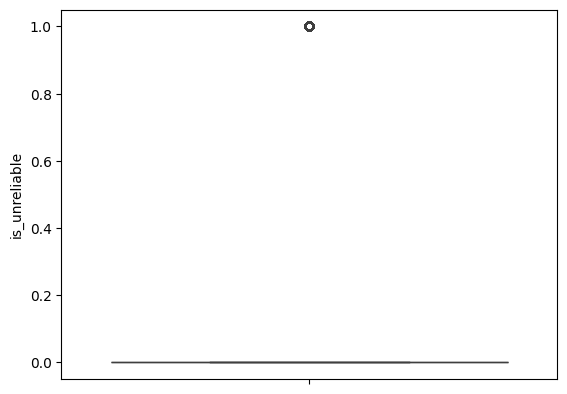

In [54]:
sns.boxplot(merge_all['is_unreliable']);


In [55]:
merge_all.is_unreliable.unique()

array([0., 1.])

In [72]:
merge_all.is_unreliable = merge_all.is_unreliable.astype('int')

<Axes: >

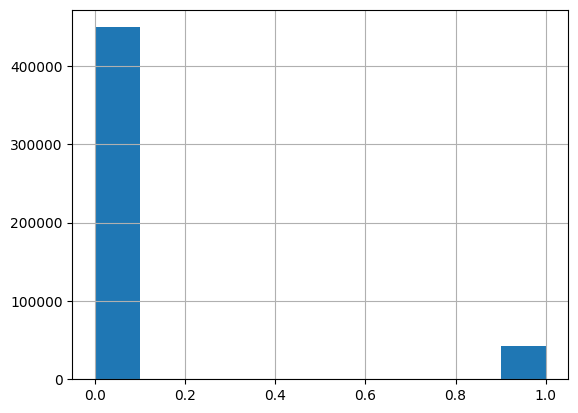

In [75]:
merge_all.is_unreliable.hist()

In [56]:
def outliers_indices(feature):
    '''
    Будем считать выбросами все точки, выходящие за пределы трёх сигм.
    '''
    mid = merge_all[feature].mean()
    sigma = merge_all[feature].std()
    return merge_all[(merge_all[feature] < mid - 3*sigma) | (merge_all[feature] > mid + 3*sigma)].index

In [57]:
wrong_type = outliers_indices('humidity')
wrong_value = outliers_indices('value')
wrong_goods = outliers_indices('roof_area_piece_goods')
wrong_metal = outliers_indices('roof_area_metal')
wrong_web = outliers_indices('roof_area_web')
wrong_area_total = outliers_indices('roof_area_total')
wrong_area = outliers_indices('residential_area')
wrong_floor = outliers_indices('floor_number')
wrong_temp = outliers_indices('temp')

out = set(wrong_type) | set(wrong_value) | set(wrong_goods) | set(wrong_metal) | set(wrong_web) | set(wrong_area_total) | set(wrong_area) | set(wrong_floor) | set(wrong_temp)

print(len(out))

46528


In [58]:
merge_all.drop(out, inplace=True)

In [73]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491829 entries, 0 to 538356
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   491829 non-null  datetime64[ns]
 1   temp                   491829 non-null  float32       
 2   humidity               491829 non-null  float64       
 3   working_year           491829 non-null  float64       
 4   working_month          491829 non-null  float64       
 5   working_day            491829 non-null  float64       
 6   address_uuid           491829 non-null  object        
 7   build_year             491829 non-null  float64       
 8   floor_number           491829 non-null  float64       
 9   residential_area       491829 non-null  float64       
 10  wall_type              491829 non-null  object        
 11  roof_area_total        491829 non-null  float64       
 12  roof_area_metal        491829 non-null  float64  

In [74]:
merge_all.head()

date      temp  humidity  working_year  working_month  working_day  \
0 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   
1 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   
2 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   
4 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   
5 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   

                           address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  e68f3476-3f10-4374-b682-00de840dae3c      1978.0           5.0   
2  e9eb42b5-40b1-459b-b75d-00e01b3dca51      1975.0           5.0   
4  90d1cab6-1aa0-4c28-9df9-01f930e6dede      1967.0           5.0   
5  623da0de-ef52-484d-8063-02962bb87e9e      1970.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки          1234.00              0.0   
1           2746.54  ж/б блок          1078.55              0.0   
2           5484.05    Кирпич          1835.00              0.0   
4           1984.20    Кирпич           903.00              0.0   
5           2924.72     Блоки          1036.00              0.0   

   roof_area_web  roof_area_piece_goods  value  is_unreliable  
0        1234.00                    0.0  5.372              0  
1        1078.55                    0.0  4.477              0  
2        1835.00                    0.0  4.935              0  
4           0.00                  903.0  0.000              0  
5        1036.00                    0.0  1.895              0

In [61]:
merge_all.isna().sum()

date                     0
temp                     0
humidity                 0
working_year             0
working_month            0
working_day              0
address_uuid             0
build_year               0
floor_number             0
residential_area         0
wall_type                0
roof_area_total          0
roof_area_metal          0
roof_area_web            0
roof_area_piece_goods    0
value                    0
is_unreliable            0
dtype: int64

In [62]:
numeric = ['humidity', 'value', 'roof_area_piece_goods', 'roof_area_metal', 'roof_area_web', 'roof_area_total',
           'residential_area', 'floor_number', 'temp']

merge_all[numeric].corr(method='spearman')

humidity     value  roof_area_piece_goods  \
humidity               1.000000  0.096892              -0.000021   
value                  0.096892  1.000000              -0.264947   
roof_area_piece_goods -0.000021 -0.264947               1.000000   
roof_area_metal        0.000313 -0.098727              -0.000267   
roof_area_web         -0.000369  0.570409              -0.499000   
roof_area_total       -0.000003  0.510115              -0.027348   
residential_area       0.000835  0.730609              -0.344105   
floor_number           0.001047  0.273810              -0.347275   
temp                  -0.173461 -0.375928              -0.000612   

                       roof_area_metal  roof_area_web  roof_area_total  \
humidity                      0.000313      -0.000369        -0.000003   
value                        -0.098727       0.570409         0.510115   
roof_area_piece_goods        -0.000267      -0.499000        -0.027348   
roof_area_metal               1.000000      -0.179388        -0.075995   
roof_area_web                -0.179388       1.000000         0.825198   
roof_area_total              -0.075995       0.825198         1.000000   
residential_area             -0.111363       0.701596         0.627916   
floor_number                 -0.048869      -0.073651        -0.281030   
temp                         -0.000461       0.001039         0.000485   

                       residential_area  floor_number      temp  
humidity                       0.000835      0.001047 -0.173461  
value                          0.730609      0.273810 -0.375928  
roof_area_piece_goods         -0.344105     -0.347275 -0.000612  
roof_area_metal               -0.111363     -0.048869 -0.000461  
roof_area_web                  0.701596     -0.073651  0.001039  
roof_area_total                0.627916     -0.281030  0.000485  
residential_area               1.000000      0.378292 -0.000227  
floor_number                   0.378292      1.000000 -0.000657  
temp                          -0.000227     -0.000657  1.000000

<Axes: >

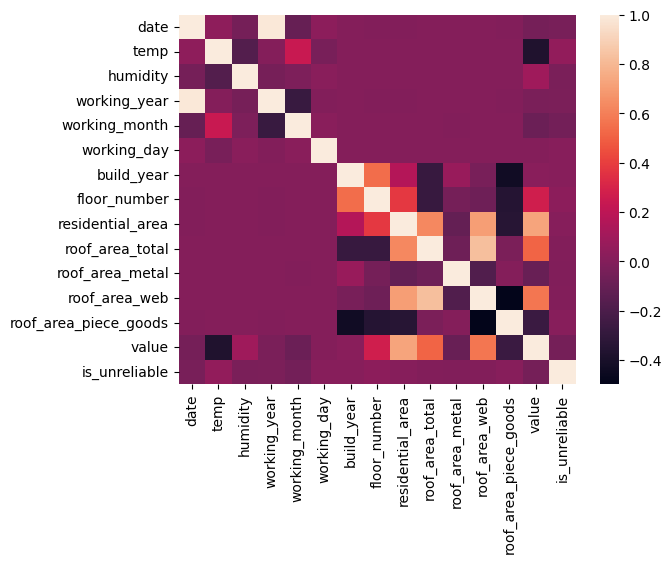

In [69]:
corr = merge_all.drop(['address_uuid', 'wall_type'], axis=1).corr(method='spearman')
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [76]:
from sklearn import preprocessing

In [96]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(merge_all["wall_type"]) 

LabelEncoder()

In [97]:
print(list(label_encoder.classes_)) 

[0, 1, 2, 3, 4, 5, 6]


In [98]:
print(label_encoder.transform(merge_all["wall_type"]))

[0 6 3 ... 3 3 4]


In [99]:
merge_all["wall_type"] = label_encoder.transform(merge_all["wall_type"])

In [100]:
merge_all.wall_type.unique()

array([0, 6, 3, 4, 5, 2, 1], dtype=int64)

<Axes: >

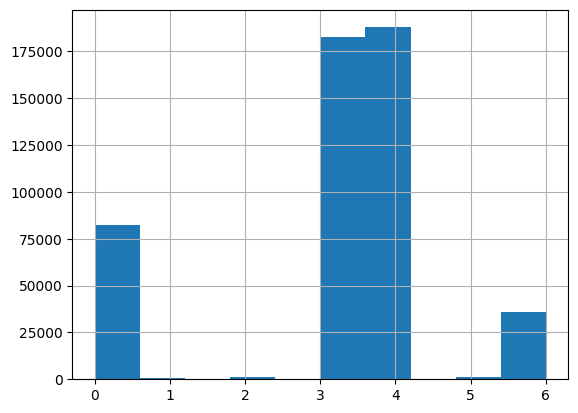

In [101]:
merge_all.wall_type.hist()

In [90]:
import matplotlib.pyplot as plt

(16.5, -0.5)

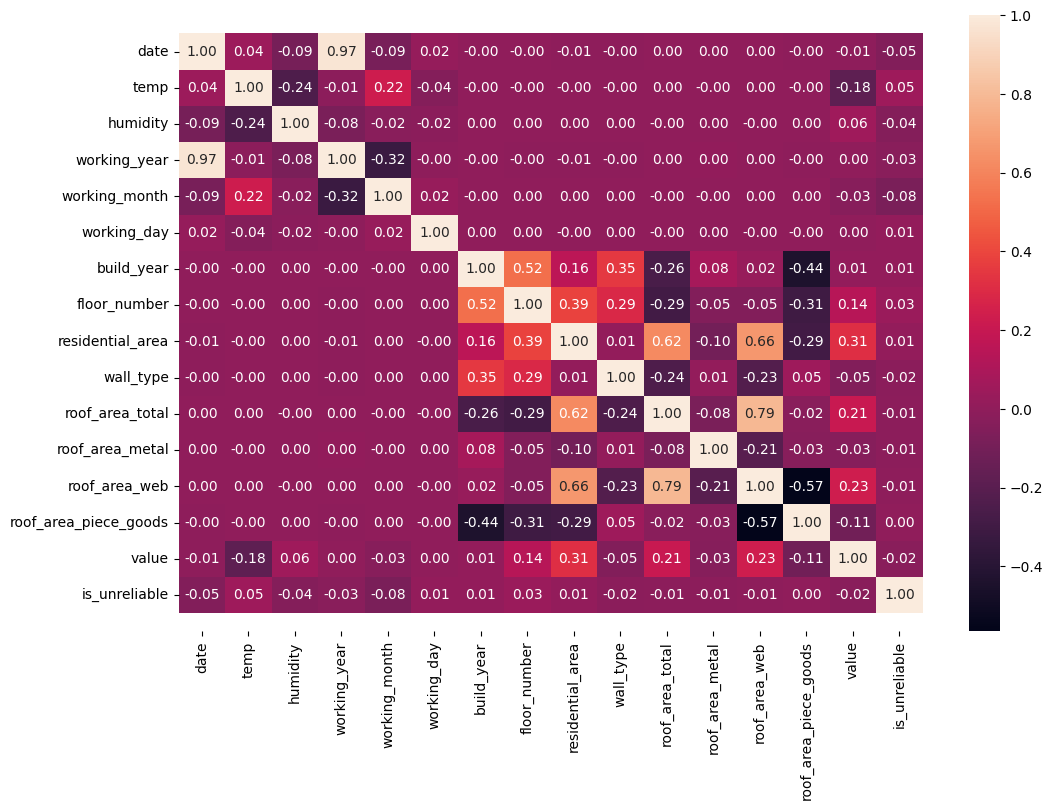

In [102]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(merge_all.drop(['address_uuid'], axis=1).corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

C:\Users\gr611_mavvl\AppData\Local\Temp\ipykernel_31684\1354268461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_all["temp"]);


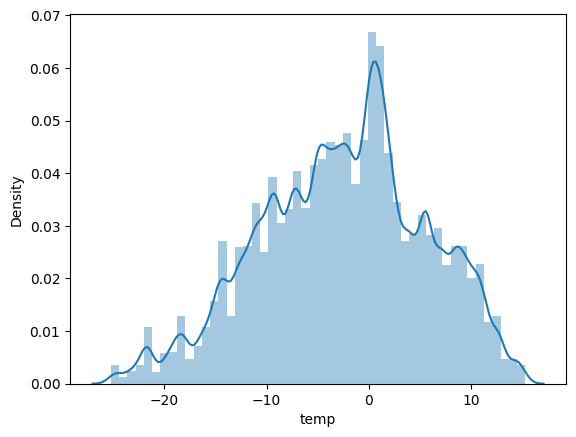

In [104]:
sns.distplot(merge_all["temp"]);

In [106]:
# 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

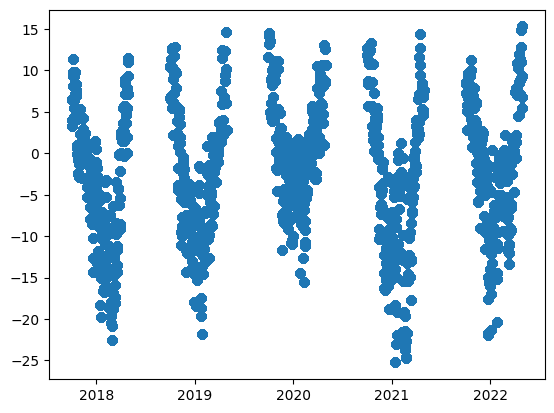

In [108]:
plt.scatter(merge_all["date"], merge_all['temp'])

In [118]:
uid_count = merge_all.groupby('date').agg({'address_uuid' : 'count'}).rename(columns={'address_uuid' : 'count_uid'}).reset_index()

In [119]:
uid_count.head(1)

date  count_uid
0 2017-10-01        440

In [130]:
value_sum = merge_all.groupby('date').agg({'value' : 'sum'}).rename(columns={'value' : 'value_sum'}).reset_index()

In [255]:
value_sum_one = merge_all.groupby(['working_year', 'address_uuid']).agg({'value' : 'sum'}).rename(columns={'value' : 'value_sum_one'}).reset_index()

In [256]:
value_sum_one.head(2)

working_year                          address_uuid  value_sum_one
0        2017.0  00cc28c1-3c57-4e8b-aaa1-72083f02c6cf        297.691
1        2017.0  00d892b3-6391-4c13-aca7-7ac788076768        319.105

In [120]:
df = merge_all.merge(uid_count, how='outer', left_on='date', right_on='date')

In [131]:
df = df.merge(value_sum, how='outer', left_on='date', right_on='date')

In [257]:
df = df.merge(value_sum_one, how='outer', left_on='address_uuid', right_on='address_uuid')

In [258]:
df.isna().sum()

date                     0
temp                     0
humidity                 0
working_year_x           0
working_month            0
working_day              0
address_uuid             0
build_year               0
floor_number             0
residential_area         0
wall_type                0
roof_area_total          0
roof_area_metal          0
roof_area_web            0
roof_area_piece_goods    0
value                    0
is_unreliable            0
count_uid                0
value_sum                0
working_year_y           0
value_sum_one            0
dtype: int64

In [259]:
df.head(2)

date      temp  humidity  working_year_x  working_month  working_day  \
0 2017-10-01  6.415002     95.25          2017.0           10.0          1.0   
1 2017-10-01  6.415002     95.25          2017.0           10.0          1.0   

                           address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   

   residential_area  ...  roof_area_total  roof_area_metal  roof_area_web  \
0           4621.25  ...           1234.0              0.0         1234.0   
1           4621.25  ...           1234.0              0.0         1234.0   

   roof_area_piece_goods  value  is_unreliable  count_uid  value_sum  \
0                    0.0  5.372              0        440   1217.063   
1                    0.0  5.372              0        440   1217.063   

   working_year_y  value_sum_one  
0          2017.0        500.817  
1          2018.0       1041.884  

[2 rows x 21 columns]

(20.5, -0.5)

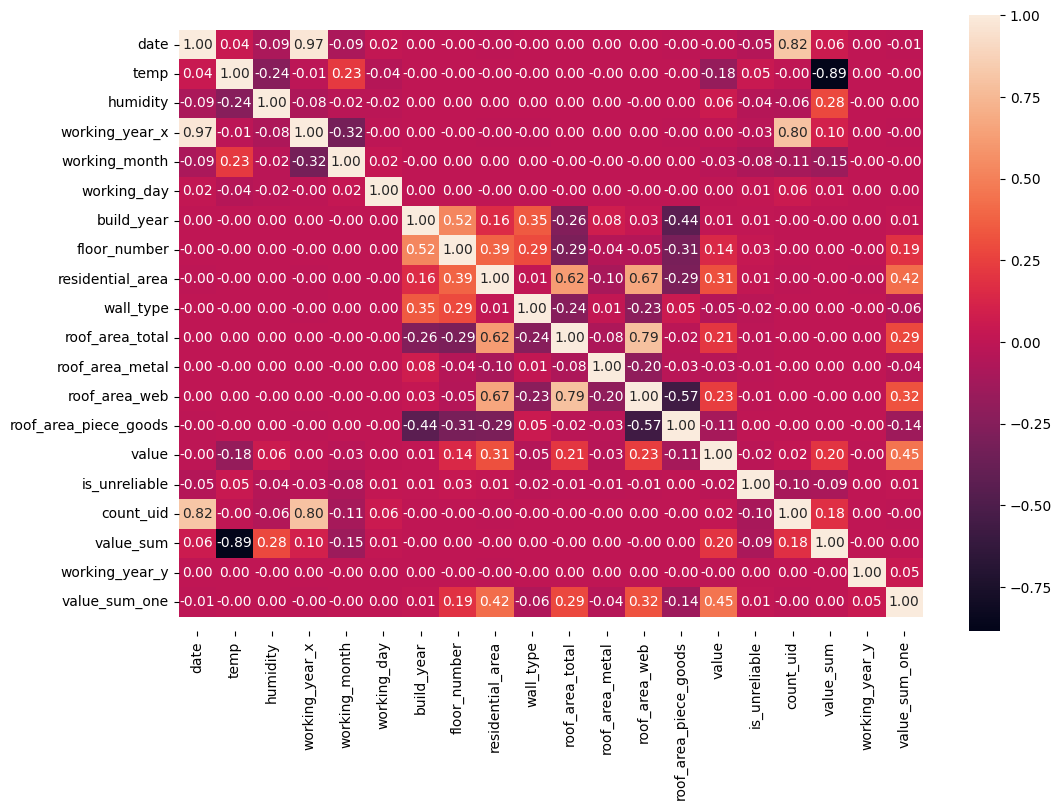

In [260]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(df.drop(['address_uuid'], axis=1).corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [112]:
import numpy as np

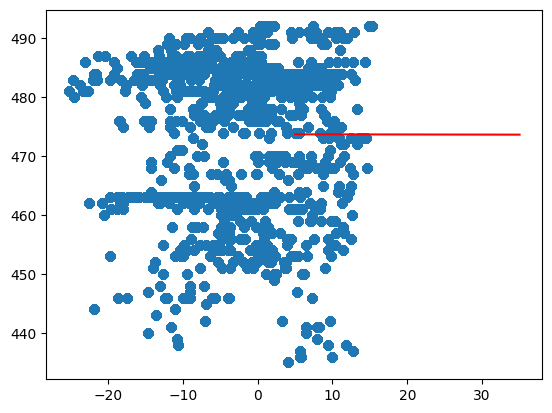

In [144]:
linreg = LinearRegression(fit_intercept = True) 

X2= df["temp"]
y2= df["count_uid"]

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, 
        test_size = 0.3, random_state=42)

#x2_train= x2_train.
linreg.fit(np.array(x2_train).reshape(-1, 1), y2_train)
a = linreg.coef_
b = linreg.intercept_
plt.scatter(df["temp"], df['count_uid'])

plt.plot([5, 35], [a*5 + b, a*35 + b], "r")

In [147]:
df.head(1)

date      temp  humidity  working_year  working_month  working_day  \
0 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   

                           address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   

   residential_area  wall_type  roof_area_total  roof_area_metal  \
0           4621.25          0           1234.0              0.0   

   roof_area_web  roof_area_piece_goods  value  is_unreliable  count_uid  \
0         1234.0                    0.0  5.372              0        440   

   value_sum  
0   1217.063

In [261]:
X = df.drop(["value_sum_one", "date"], axis = 1)
y = df["value_sum_one"]

In [262]:
X.shape, y.shape

((2926255, 19), (2926255,))

In [263]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
        test_size = 0.3, random_state=12345)

In [243]:
from catboost import CatBoostRegressor

In [266]:
str_list = [_ for _ in df.columns if df[_].dtype == 'object']

In [290]:
model_cbr = CatBoostRegressor(iterations=70,
                          learning_rate=5,
                          depth=16,
                          verbose=False)

In [291]:
model_cbr.fit(x_train, y_train, cat_features=str_list)

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


In [298]:
predictions = model_cbr.predict(x_test)

In [300]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Оценка качества модели
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
 
print("MSE: ", mse)
print("R^2: ", r2)

MSE:  2.3358190859273085e+89
R^2:  -8.021164573265893e+83


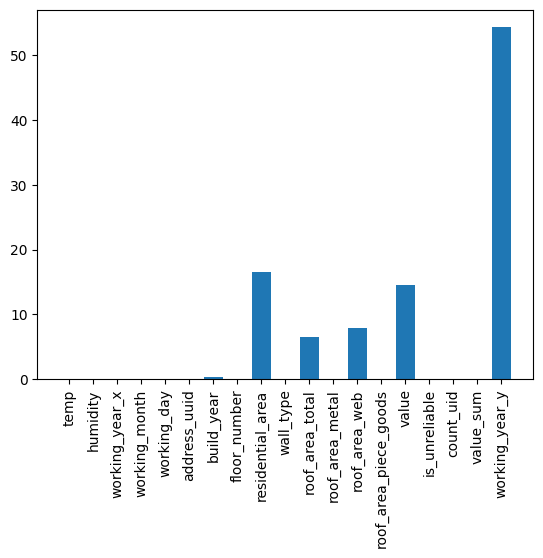

In [301]:
# Анализ важности признаков
feature_importance = model_cbr.get_feature_importance()
feature_names = model_cbr.feature_names_
 
# Визуализация важности признаков
import matplotlib.pyplot as plt
 
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.show()

In [302]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model_cbr, f)

In [303]:
df.to_csv('data.csv')